<a href="https://colab.research.google.com/github/18wh1a1240/ML-Assignments-WISE/blob/main/Wine_logistic%2C_KNN%2CDecision%2CID3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/Wine.csv')
data.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [ ]:
data.describe()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##**Exploratory Data Analysis**

In [ ]:
def plot_scatter(df, cols):
    plt.figure(figsize=(20, 20))
    plt.suptitle('Independent vs Dependent Features')
    for loc, col in enumerate(cols):
        plt.subplot(4, 4, loc + 1)
        plt.scatter(df[col], df['1065'])
        plt.xlabel(f'{col}')
        plt.ylabel('1065')
    return None

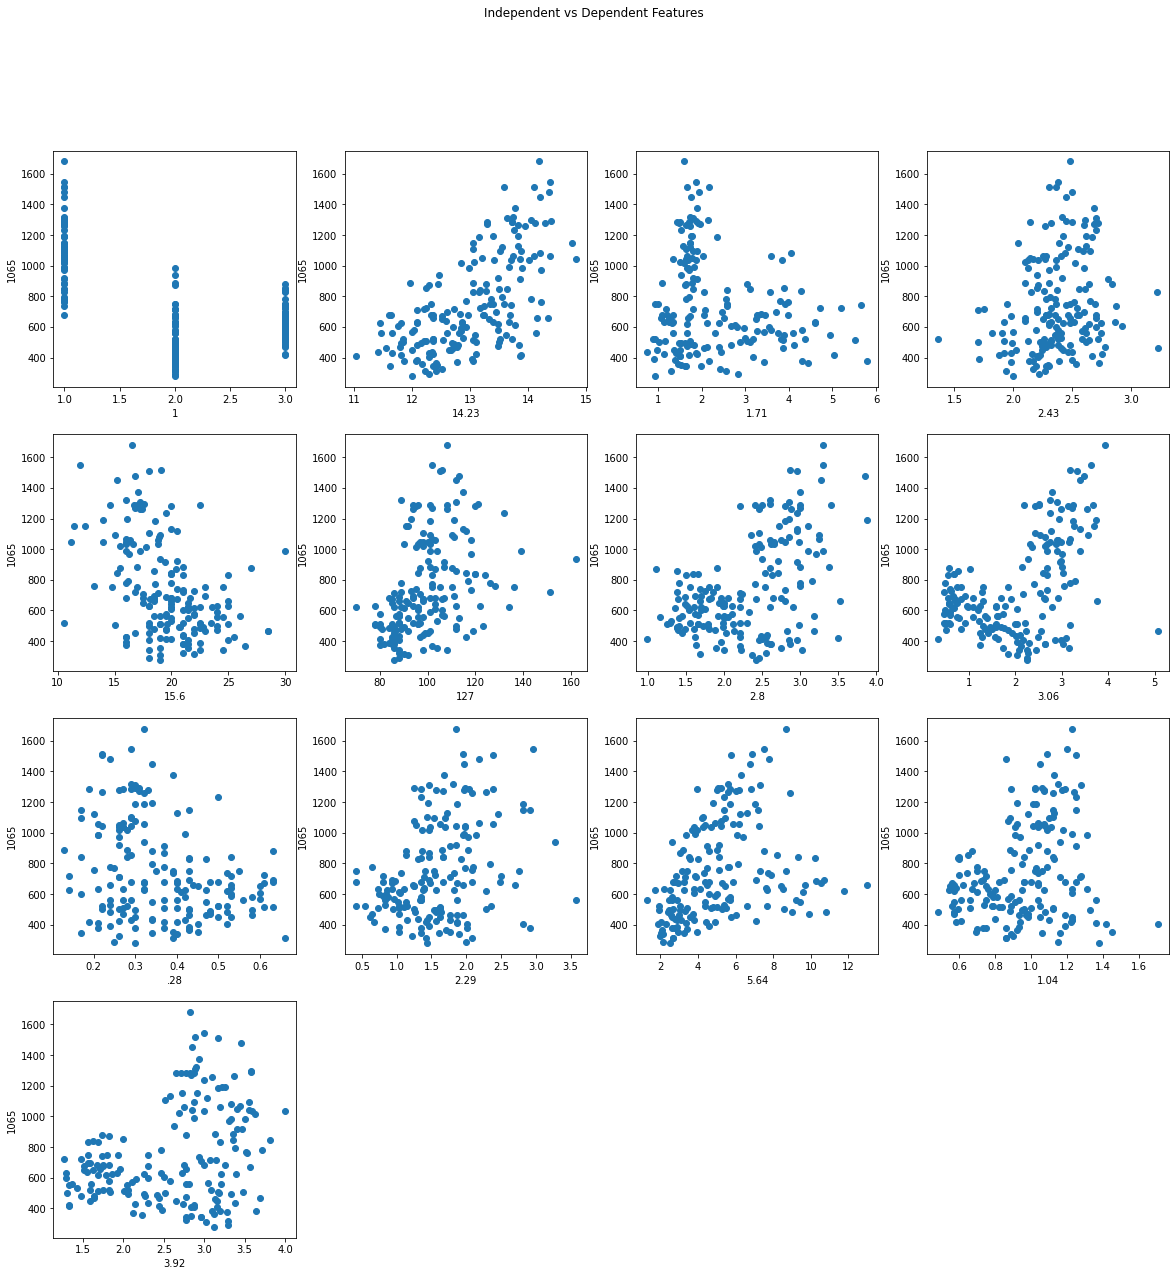

In [ ]:
plot_scatter(data, data.columns[:-1])
plt.show()
plt.close()

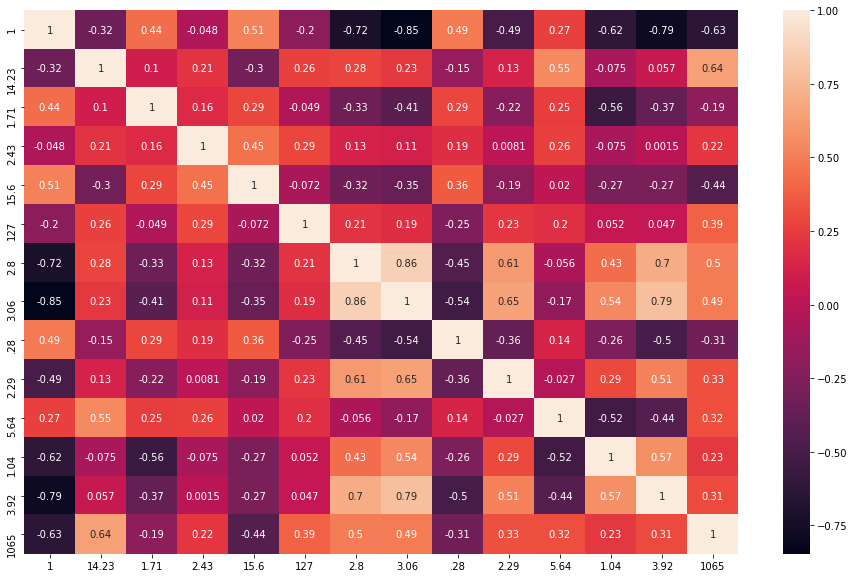

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

##**Splitting Dataset**

In [ ]:
features = data.drop(['1065'], axis = 1)
target = data['1065']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print(X_train.shape)

(123, 13)


**Model Training**

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(lr_model.intercept_, lr_model.coef_)

217.2274625519475 [-321.74879813   49.82463236   11.49351742  118.60606006  -14.76248646
    3.321913     35.23593718  -75.97960096  -43.0092722    -1.55504851
   50.28683798  113.08391846  -43.27625154]


In [ ]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

print(f"Training error: {sqrt(mean_squared_error(y_train, train_pred)):.3f}")
print(f"Testing error: {sqrt(mean_squared_error(y_test, test_pred)):.3f}")

Training error: 150.961
Testing error: 200.631


In [ ]:
y_test

19      780
45     1065
139     600
30     1515
67      750
16     1130
119     625
173     750
109     562
140     780
24      830
161     570
41     1095
118     564
15     1280
111     607
113     385
82      515
9      1510
114     407
18      845
66      510
60      450
168     630
170     470
150     480
117     372
65      502
90      450
55      970
29     1285
127     342
144     830
31      990
12     1150
42      680
156     880
136     515
98      406
158     620
38      760
108     680
85      495
68      718
142     550
2      1480
100     562
122     380
153     640
51     1190
76      500
56     1270
26     1285
152     675
Name: 1065, dtype: int64

In [ ]:
test_pred

array([1165.62236176, 1100.0616416 ,  468.37641571, 1132.75651634,
        800.8497574 , 1174.31126626,  463.27222321,  622.50684946,
        480.31725521,  474.49087386, 1029.19122696,  536.08690656,
       1082.6151015 ,  421.36611441, 1216.95106773,  685.68568541,
        444.03541834,  651.63795895, 1110.55120808,  427.58310364,
       1149.94129391,  521.55000507,  814.35880141,  718.30882441,
        664.29484243,  731.64577457,  614.87017946,  582.05725853,
        554.08405394, 1202.03661257, 1066.93137416,  371.09662738,
        419.37420189, 1037.33759541, 1168.50865829, 1015.32524746,
        515.942634  ,  462.27878742,  514.51868339,  779.83204142,
       1245.12118661,  464.03792687,  523.66405196,  770.15609504,
        499.9158032 , 1254.71629468,  515.61806436,  465.61012954,
        553.38110407, 1216.7901429 ,  640.7967761 , 1133.17556369,
        991.59213941,  770.16826431])

In [ ]:
lr_model.score(X_test, y_test)

0.6033196351239013

In [ ]:
lr_model.score(X_train, y_train)

0.7656277889561209

##Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [ ]:
data = pd.read_csv('/content/Wine.csv')
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data.columns = ['class','alcohol','malicAcid','ash','alkalinity of ash','magnesium','totalPhenols','flavanoids','nonFlavanoidPhenols',
                'proanthocyanins','colorIntensity','hue','od280/od315_of_diluted_wines','proline']
data

,class,alcohol,malicAcid,ash,alkalinity of ash,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280/od315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         177 non-null    int64  
 1   alcohol                       177 non-null    float64
 2   malicAcid                     177 non-null    float64
 3   ash                           177 non-null    float64
 4   alkalinity of ash             177 non-null    float64
 5   magnesium                     177 non-null    int64  
 6   totalPhenols                  177 non-null    float64
 7   flavanoids                    177 non-null    float64
 8   nonFlavanoidPhenols           177 non-null    float64
 9   proanthocyanins               177 non-null    float64
 10  colorIntensity                177 non-null    float64
 11  hue                           177 non-null    float64
 12  od280/od315_of_diluted_wines  177 non-null    float64
 13  proli

In [ ]:
data.tail()

,class,alcohol,malicAcid,ash,alkalinity of ash,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280/od315_of_diluted_wines,proline
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
176,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
features = data.drop(['class'],axis=1)
target = data['class']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.35, random_state=42)

##Logistic

In [ ]:
logreg_model = LogisticRegression(max_iter=3000, solver='lbfgs')
logreg_model.fit(X_train, y_train)

train_pred = logreg_model.predict(X_train)
test_pred =  logreg_model.predict(X_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 95.161%


##KNN Algo

In [ ]:
k_range = range(1, 21)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    train_pred = knn_model.predict(X_train)
    test_pred =  knn_model.predict(X_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

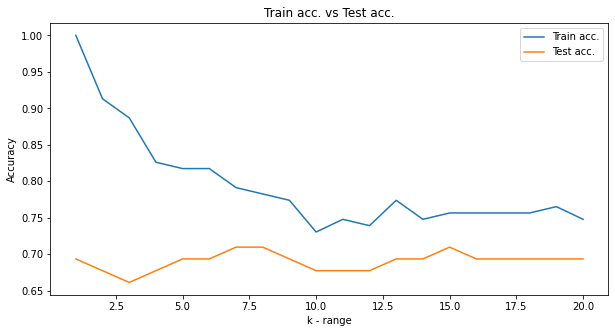

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
test_pred =  knn_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 73.043%
Testing Accuracy: 67.742%


##Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 85.484%


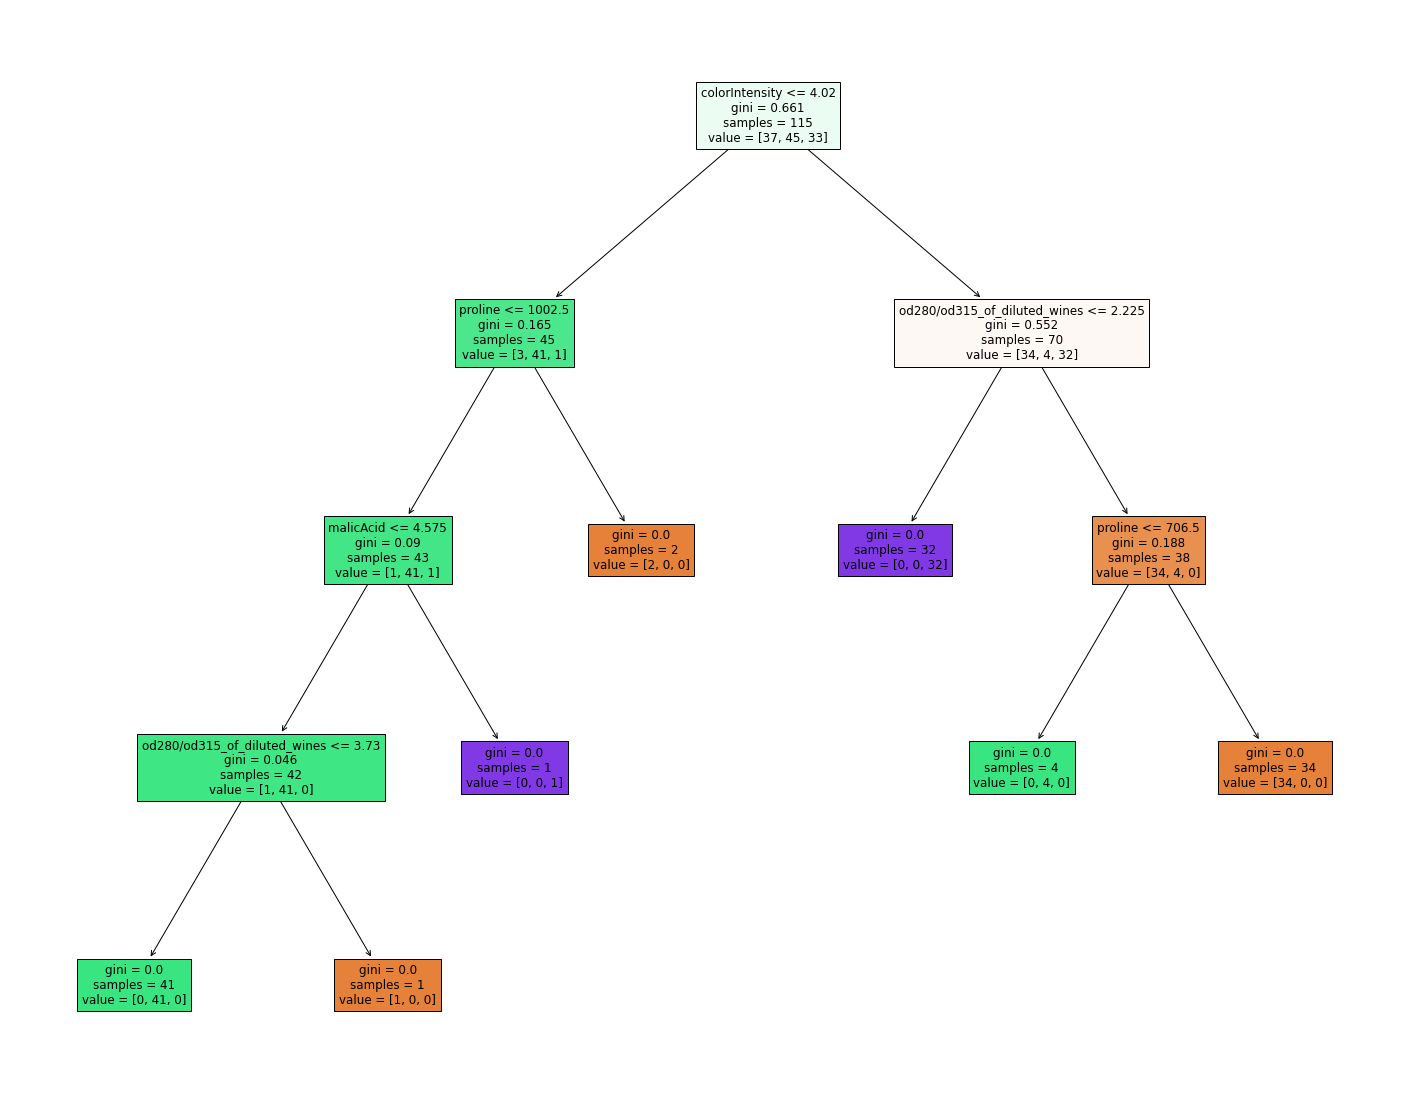

In [ ]:
fig = plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, label='all')
plt.show()

##ID3

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

train_pred = dt_model.predict(X_train)
test_pred =  dt_model.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 100.000%
Testing Accuracy: 91.935%


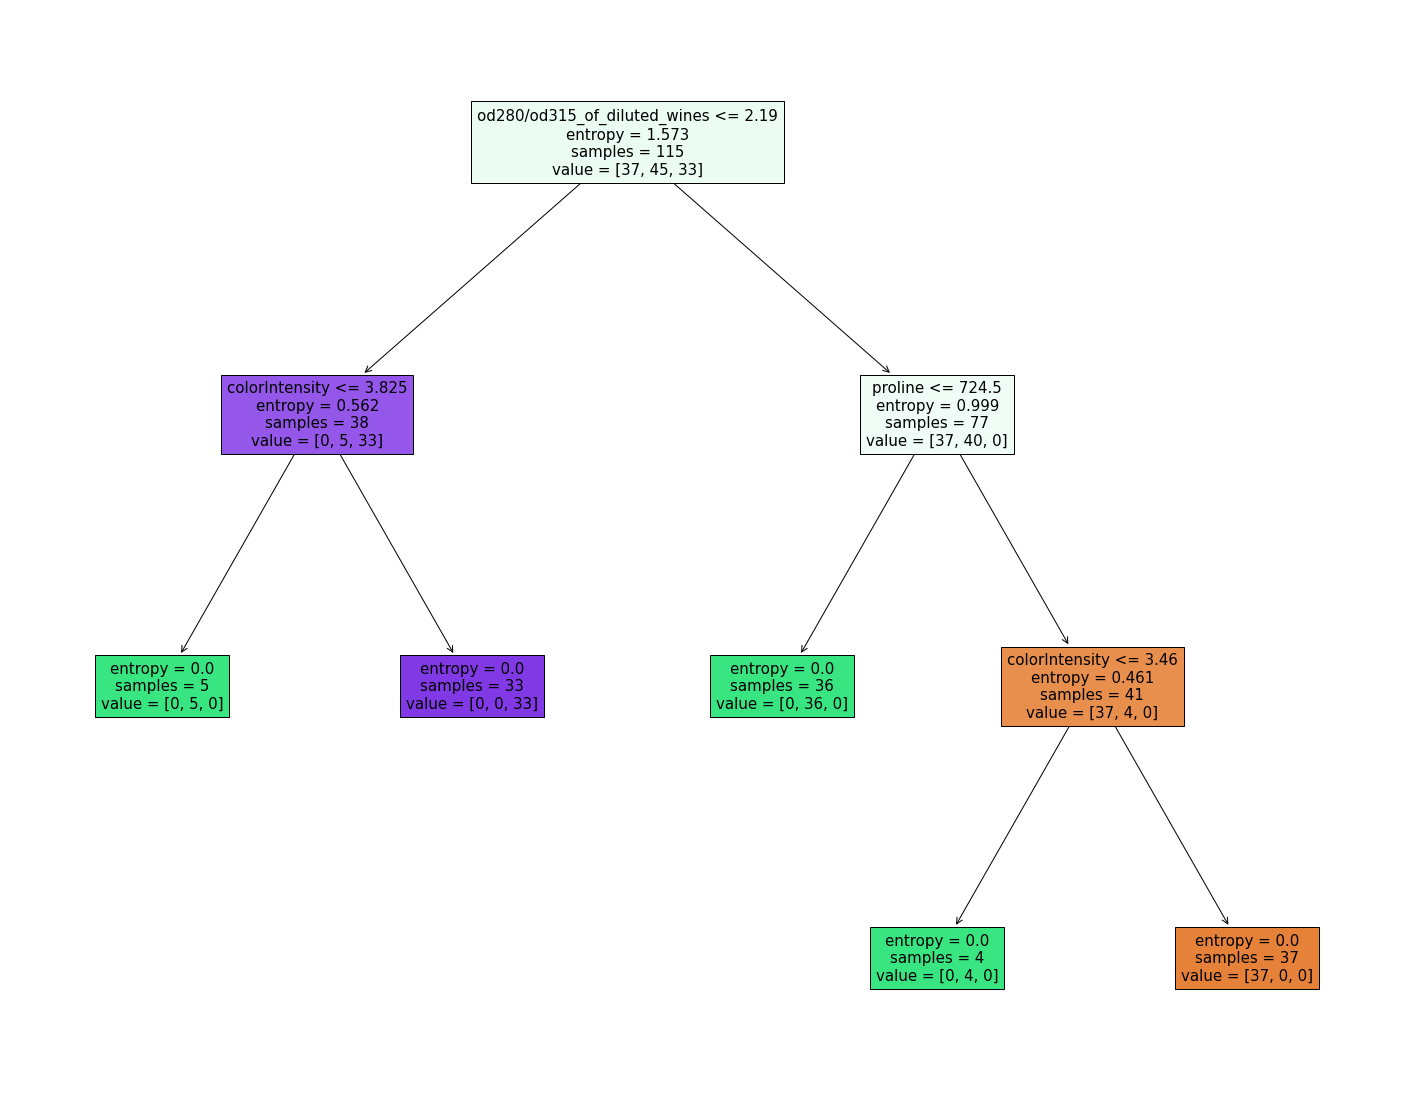

In [ ]:
fig = plt.figure(figsize=(25, 20))
plot_tree(dt_model, filled=True, feature_names=features.columns, label='all')
plt.show()